In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from scipy.optimize import curve_fit
from sklearn import mixture
from matplotlib.colors import LogNorm


matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [17]:
Gfile = 'kepler_dr2_1arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')
gaia = data.to_pandas()
print(gaia.shape)

Gok = np.where(np.isfinite(gaia[u'parallax']) & # this is basically the same as the TGAS file...
              (gaia[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(gaia[u'bp_rp']) & 
              (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.01) & 
              (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.01) & 
              (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.01))[0]
print(Gok.shape)

# v3 from: http://keplerebs.villanova.edu
bin_file = 'keplerebs.villanova.edu.csv'
rot = pd.read_csv(bin_file)
print(rot.shape)

df = pd.merge(rot, gaia, right_on='kepid', left_on='KIC')
print(df.shape)

ok = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01))[0]
print(ok.shape)

(197090, 101)
(181815,)
(2909, 12)
(2861, 113)
(2055,)


Text(0,0.5,'$M_G$ (mag)')

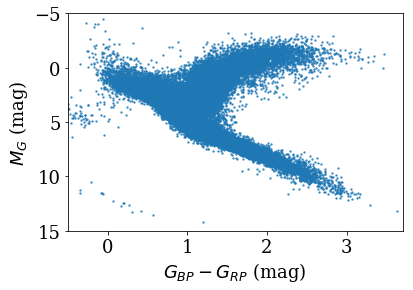

In [20]:
plt.scatter(gaia[u'bp_rp'].values[Gok], 
            gaia[u'phot_g_mean_mag'].values[Gok] - 5. * np.log10(gaia[u'r_est'].values[Gok])  + 5, 
            alpha=0.7, s=2, cmap=cm)


plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')


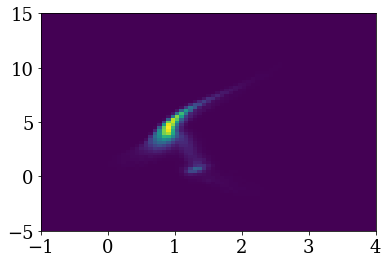

In [113]:
Nx,Ny = 75,75
cG, xeG, yeG, iG = plt.hist2d(gaia[u'bp_rp'].values[Gok], 
                            gaia[u'phot_g_mean_mag'].values[Gok] - 5. * np.log10(gaia[u'r_est'].values[Gok])  + 5, 
                            range=[[-1,4],[-5,15]], bins=(Nx,Ny))

Text(0,0.5,'$M_G$ (mag)')

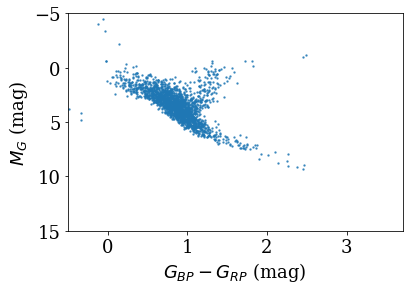

In [114]:
plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
            alpha=0.7, s=2, cmap=cm)

plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

Text(0,0.5,'$M_G$ (mag)')

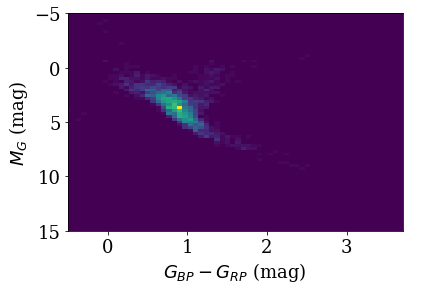

In [115]:
cb,xeb,yeb,ib = plt.hist2d(df[u'bp_rp'].values[ok], 
                            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
                            range=[[-1,4],[-5,15]], bins=(Nx,Ny))
plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/james/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


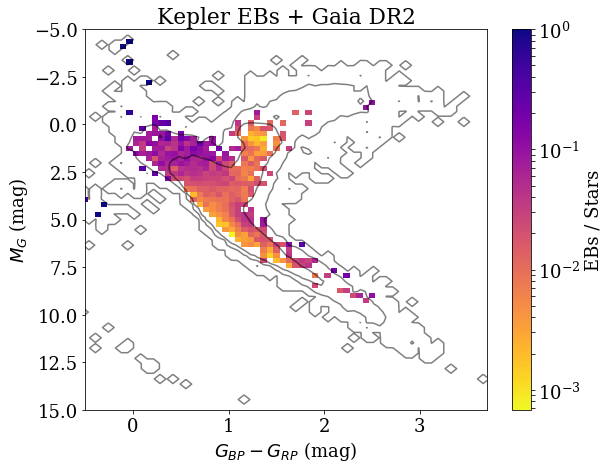

In [139]:
plt.figure(figsize=(9,7))
ratio = cb.T / (cG.T)
plt.imshow(ratio, norm=LogNorm(), 
           origin='lower', extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], 
           aspect='auto', cmap=plt.cm.plasma_r )

clbr = plt.colorbar()
clbr.set_label('EBs / Stars')

plt.contour(cG.T, extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], levels=[.1, 10, 100], colors='k', alpha=0.5)


plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('Kepler EBs + Gaia DR2')
plt.savefig('Kepler_EBs_vs_DR2.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [144]:
okL = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01) & 
               (df['period'] > 20))[0]

okS = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01) & 
               (df['period'] <= 20))[0]

print(okL.shape)

(490,)


Text(0,0.5,'$M_G$ (mag)')

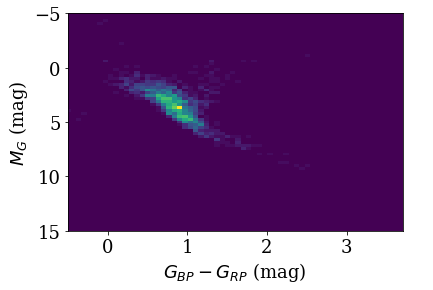

In [145]:
cS,xeS,yeS,iS = plt.hist2d(df[u'bp_rp'].values[okS], 
                            df[u'phot_g_mean_mag'].values[okS] - 5. * np.log10(df[u'r_est'].values[okS])  + 5, 
                            range=[[-1,4],[-5,15]], bins=(Nx,Ny))
plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

Text(0,0.5,'$M_G$ (mag)')

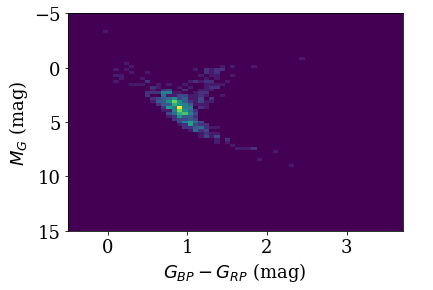

In [146]:
cL,xeL,yeL,iL = plt.hist2d(df[u'bp_rp'].values[okL], 
                            df[u'phot_g_mean_mag'].values[okL] - 5. * np.log10(df[u'r_est'].values[okL])  + 5, 
                            range=[[-1,4],[-5,15]], bins=(Nx,Ny))
plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'$P_{orb}$ > 20d')

/Users/james/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


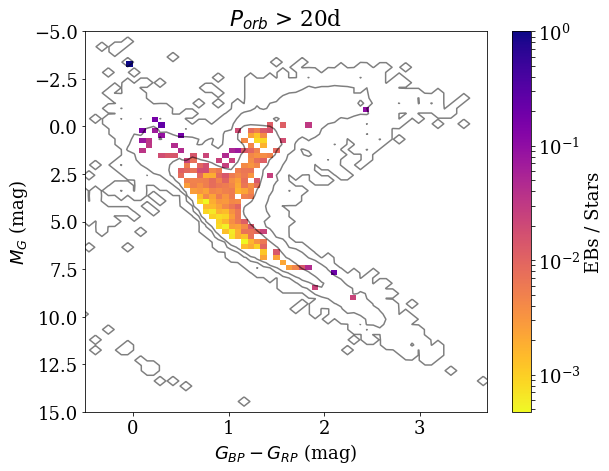

In [149]:
plt.figure(figsize=(9,7))
ratio = cL.T / (cG.T)
plt.imshow(ratio, norm=LogNorm(), 
           origin='lower', extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], 
           aspect='auto', cmap=plt.cm.plasma_r )

clbr = plt.colorbar()
clbr.set_label('EBs / Stars')

plt.contour(cG.T, extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], levels=[.1, 10, 100], colors='k', alpha=0.5)

plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('$P_{orb}$ > 20d')
# plt.savefig('Kepler_EBs_vs_DR2.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'$P_{orb}$ < 20d')

/Users/james/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


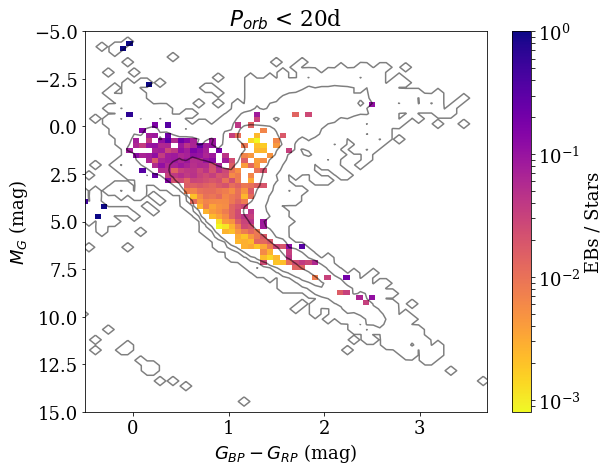

In [150]:
plt.figure(figsize=(9,7))
ratio = cS.T / (cG.T)
plt.imshow(ratio, norm=LogNorm(), 
           origin='lower', extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], 
           aspect='auto', cmap=plt.cm.plasma_r )

clbr = plt.colorbar()
clbr.set_label('EBs / Stars')

plt.contour(cG.T, extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], levels=[.1, 10, 100], colors='k', alpha=0.5)

plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('$P_{orb}$ < 20d')

# plt.savefig('Kepler_EBs_vs_DR2.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0,0.5,'$M_G$ (mag)')

/Users/james/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


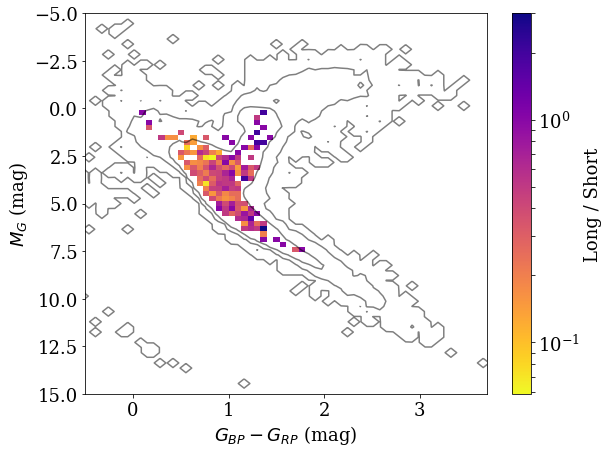

In [151]:
plt.figure(figsize=(9,7))
ratio = cL.T / (cS.T)
plt.imshow(ratio, norm=LogNorm(), 
           origin='lower', extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], 
           aspect='auto', cmap=plt.cm.plasma_r )

clbr = plt.colorbar()
clbr.set_label('Long / Short')

plt.contour(cG.T, extent=[xeb.min(),xeb.max(),yeb.min(),yeb.max()], levels=[.1, 10, 100], colors='k', alpha=0.5)

plt.ylim(15,-5)
plt.xlim(-0.5,3.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
# plt.title('$P_{orb}$ < 20d')

# plt.savefig('Kepler_EBs_vs_DR2.png', dpi=300, bbox_inches='tight', pad_inches=0.25)